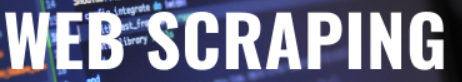

# Project - Web Scraping (Web Data Extraction)
(Guided by Dataquest Course)

* A lot of data aren't accessible through data sets or APIs. They may exist on the Internet as Web pages, though. One way to access the data without waiting for the provider to create an API is to use a technique called Web scraping.


* Web scraping allows us to load a Web page into Python and extract the information we want. We can then work with the data using standard analysis tools like pandas and numpy.


* Before we can do Web scraping, we need to understand the structure of the Web page we're working with, then find a way to extract parts of that structure in a sensible way.

### Tools Used- 
* **requests library** - This library enables us to download a Web page. 
* **beautifulsoup library** - to extract the relevant parts of the Web page.

### 1- Web Page Structure
Web pages use HyperText Markup Language (HTML). 

In [8]:
# Make a GET request to http://dataquestio.github.io/web-scraping-pages/simple.html, 
# and assign the result to the variable response.
# Use response.content to get the content of the response, and assign it to content.
# Note how the content is the same as the HTML above.

import requests
response = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html")
content = response.content

### 2- Retrieving Elements from a Page

* Downloading the page is the easy part. Let's say that we want to get the text in the first paragraph. Now we need to parse the page and extract the information we want.

* We'll use the BeautifulSoup library to parse the Web page with Python. This library allows us to extract tags from an HTML document.

* We can think of HTML documents as "trees," and the nested tags as "branches" (similar to a family tree). BeautifulSoup works the same way.

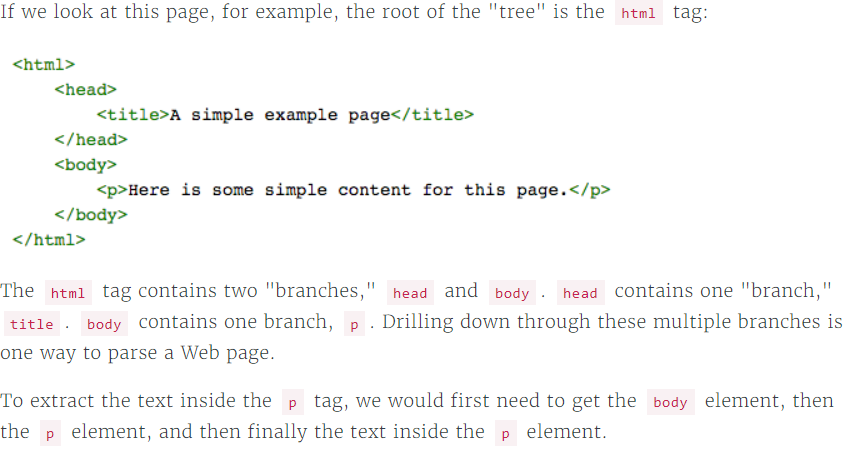

In [9]:
# Get the text inside the title tag, and assign the result to title_text

from bs4 import BeautifulSoup

# Initialize the parser, and pass in the content we grabbed earlier.
parser = BeautifulSoup(content, 'html.parser')

# Get the body tag from the document.
# Since we passed in the top level of the document to the parser, we need to pick a branch off of the root.
# With BeautifulSoup, we can access branches by using tag types as attributes.
body = parser.body

# Get the p tag from the body.
p = body.p

# Print the text inside the p tag.
# Text is a property that gets the inside text of a tag.
print(p.text)
head = parser.head
title = head.title
title_text = title.text

Here is some simple content for this page.


### 3- Using Find All

* While it's nice to use the tag type as a property, it's not always a very robust way to parse a document. It's usually better to be more explicit by using the find_all method. This method will find all occurrences of a tag in the current element, and return a list.

* If we only want the first occurrence of an item, we'll need to index the list to get it. Aside from this difference, it behaves the same way as passing in the tag type as an attribute.



In [10]:
# Apply the find_all method to get the text inside the title tag, and assign the result to title_text.
parser = BeautifulSoup(content, 'html.parser')

# Get a list of all occurrences of the body tag in the element.
body = parser.find_all("body")

# Get the paragraph tag.
p = body[0].find_all("p")

# Get the text.
print(p[0].text)
head = parser.find_all("head")
title = head[0].find_all("title")
title_text = title[0].text

Here is some simple content for this page.


### 4- Element IDs
HTML allows elements to have IDs. Because they are unique, we can use an ID to refer to a specific element.

Here's an example page:
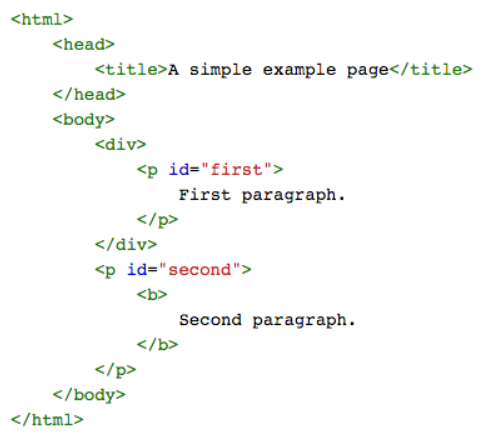

* You can see the page [here.](http://dataquestio.github.io/web-scraping-pages/simple_ids.html)

* HTML uses the div tag to create a divider that splits the page into logical units. We can think of a divider as a "box" that contains content. For example, different dividers hold a Web page's footer, sidebar, and horizontal menu.

* There are two paragraphs on the page; the first is nested inside a div. Luckily, the paragraphs have IDs. This means we can access them easily, even though they're nested.

* Let's use the find_all method to access those paragraphs, and pass in the additional id attribute.


In [11]:
# Get the text of the second paragraph (what's inside the second p tag), 
# and assign the result to second_paragraph_text.
# Get the page content and set up a new parser.
response = requests.get("http://dataquestio.github.io/web-scraping-pages/simple_ids.html")
content = response.content
parser = BeautifulSoup(content, 'html.parser')

# Pass in the ID attribute to only get the element with that specific ID.
first_paragraph = parser.find_all("p", id="first")[0]
print(first_paragraph.text)
second_paragraph = parser.find_all("p", id="second")[0]
second_paragraph_text = second_paragraph.text


                First paragraph.
            


* In HTML, elements can also have classes. Classes aren't globally unique. In other words, many different elements belong to the same class, usually because they share a common purpose or characteristic.

* For example, you may want to create three dividers to display three of your photographs. You can create a common look and feel for these dividers, such as a border and caption style.

* This is where classes come into play. You could create a class called "gallery," define a style for it once using CSS (which we'll talk about soon), and then apply that class to all of the dividers you'll use to display photos. One element can even have multiple classes.

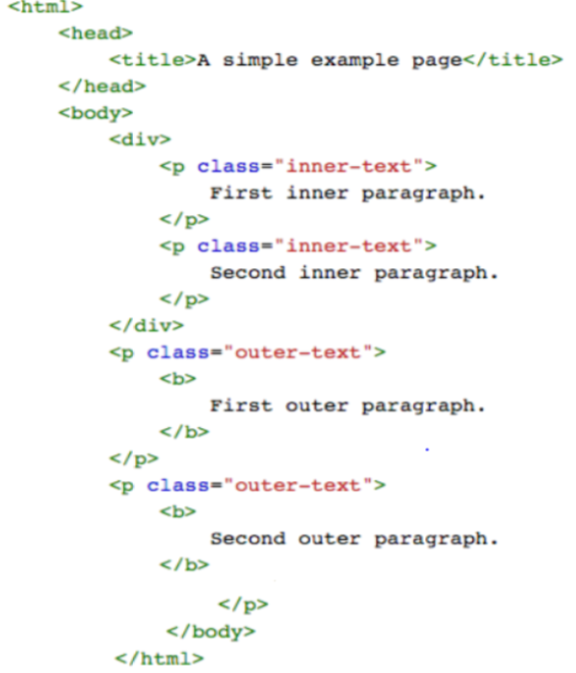
                                                                                                                         
                                                                                                                         
* Take a look at [this page](http://dataquestio.github.io/web-scraping-pages/simple_classes.html) to see how we've used classes to style paragraphs.

* We can use find_all to select elements by class. We'll just need to pass in the class_ parameter.                                                                                                                         
                                                                                                                         

In [12]:
# Get the text in the second inner paragraph, and assign the result to second_inner_paragraph_text.
# Get the text of the first outer paragraph, and assign the result to first_outer_paragraph_text.

# Get the website that contains classes.
response = requests.get("http://dataquestio.github.io/web-scraping-pages/simple_classes.html")
content = response.content
parser = BeautifulSoup(content, 'html.parser')

# Get the first inner paragraph.
# Find all the paragraph tags with the class inner-text.
# Then, take the first element in that list.
first_inner_paragraph = parser.find_all("p", class_="inner-text")[0]
print(first_inner_paragraph.text)
second_inner_paragraph = parser.find_all("p", class_="inner-text")[1]
second_inner_paragraph_text = second_inner_paragraph.text

first_outer_paragraph = parser.find_all("p", class_="outer-text")[0]
first_outer_paragraph_text = first_outer_paragraph.text


                First paragraph.
            


### 5- CSS Selectors
* Cascading Style Sheets, or CSS, is a language for adding styles to HTML pages.
* Perhaps not surprisingly, we also use CSS selectors to select elements when we do Web scraping.
* We can use BeautifulSoup's .select method to work with CSS selectors. Here's the HTML we'll be working with on this screen:
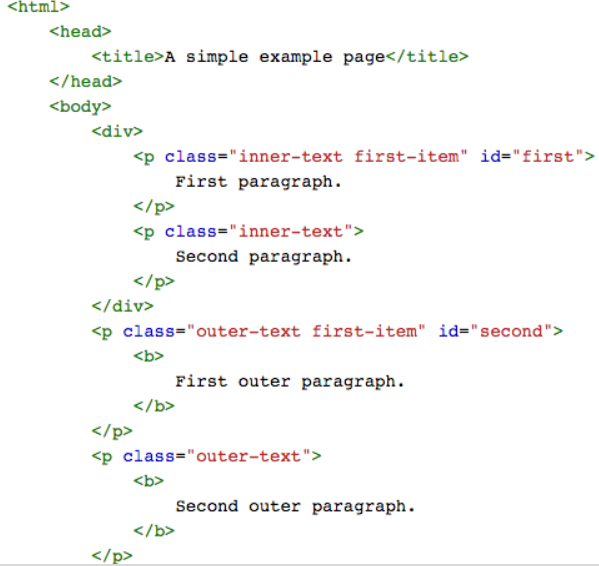

* You may have noticed that the same element can have both an ID and a class. We can also assign multiple classes to a single element; we just separate the classes with a space.

**Approach -**

* Select all of the elements that have the class outer-text.
   * Assign the text of the first paragraph that has the class outer-text to first_outer_text.

* Select all of the elements that have the ID second.
   * Assign the text of the first paragraph that has the ID second to the variable second_text.

In [13]:
# Get the website that contains classes and IDs.
response = requests.get("http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html")
content = response.content
parser = BeautifulSoup(content, 'html.parser')

# Select all of the elements that have the first-item class.
first_items = parser.select(".first-item")

# Print the text of the first paragraph (the first element with the first-item class).
print(first_items[0].text)
first_outer_text = parser.select(".outer-text")[0].text
second_text = parser.select("#second")[0].text


                First paragraph.
            


### 6- Nesting CSS Selectors

* We can nest CSS selectors similar to the way HTML nests tags. For example, we could use selectors to find all of the paragraphs inside the body tag. Nesting is a very powerful technique that enables us to use CSS to do complex Web scraping tasks.

* This selector will target any paragraph inside a div tag:

> div p


* This selector will target any item inside a div tag that has the class first-item:

> div .first-item


* This one is even more specific. It selects any item that's inside a div tag inside a body tag, but only if it also has the ID first:

> body div #first


* This selector zeroes in on any items with the ID first that are inside any items with the class first-item:

> .first-item #first


* As you can see, we can nest CSS selectors in infinite ways. This allows us to extract data from websites with complex layouts. You can test selectors by using the .select method as you write them. 
* Because it's easy to write a selector that doesn't work the way you expect, we highly recommend doing this.

* **We can use them with the same .select method we used for our CSS selectors.**

* We'll be practicing on this HTML:
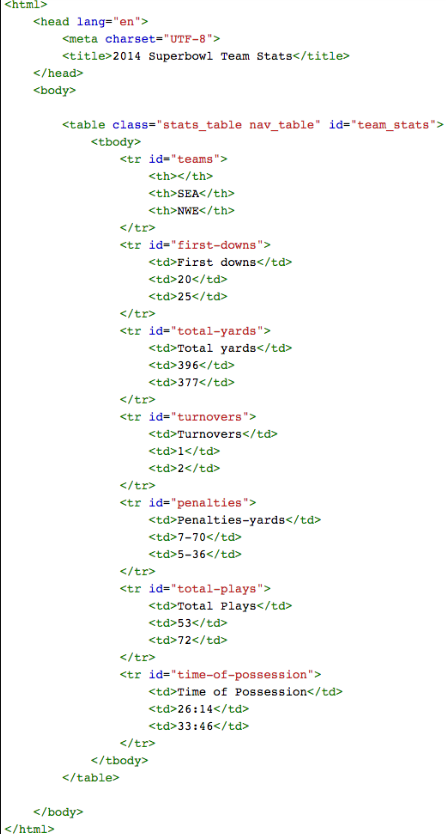


* It's an excerpt from a box score of the 2014 Super Bowl, a National Football League (NFL) game in which the New England Patriots played the Seattle Seahawks. The box score contains information on how many yards each team gained, how many turnovers each team had, and so on. Check out the [Web page](http://dataquestio.github.io/web-scraping-pages/2014_super_bowl.html) this HTML renders.

* The page renders as a table with column and row names. The first column is for the Seattle Seahawks, and the second column is for the New England Patriots. Each row represents a different statistic.

In [14]:
# Find the Total Plays for the New England Patriots, and assign the result to patriots_total_plays_count.

# Find the Total Yards for the Seahawks, and assign the result to seahawks_total_yards_count.


# Get the Superbowl box score data.
response = requests.get("http://dataquestio.github.io/web-scraping-pages/2014_super_bowl.html")
content = response.content
parser = BeautifulSoup(content, 'html.parser')

# Find the number of turnovers the Seahawks committed.
turnovers = parser.select("#turnovers")[0]
seahawks_turnovers = turnovers.select("td")[1]
seahawks_turnovers_count = seahawks_turnovers.text
print(seahawks_turnovers_count)
patriots_total_plays_count = parser.select("#total-plays")[0].select("td")[2].text

seahawks_total_yards_count = parser.select("#total-yards")[0].select("td")[1].text

1


### Learnings-

* Importing BeautifulSoup: - from bs4 import BeautifulSoup

* Initializing the HTML parser: -parser = BeautifulSoup(content, 'html.parser')

* Getting the inside text of a tag: -title_text = title.text

* Returning a list of all occurrences of a tag: -head.find_all("title")

* Getting the first instance of a tag: -title=head[0].find_all("title")

* Using CSS to make all of the text inside all paragraphs red:

> p{
    color: red
 }

* Using CSS selectors to style all elements with the class "inner-text" red:

> .inner-text{
    color: red
  }

* Working with CSS selectors:

>parser.select(".first-item")

# Conclusion
We've covered the basics of HTML and how to select elements, which are key foundational blocks.

You may be wondering why Web scraping is useful, given that in most of our examples, we could easily have found the answer by looking at the page. The real power of Web scraping lies in getting information from a large amount of pages very quickly.

Let's say we wanted to find the total number of yards each NFL team gained in every single NFL game over an entire season. We could do this manually, but it would take days of boring drudgery. We could write a script to automate this in a couple of hours instead, and have a lot more fun doing it.